In [43]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Data Preparation

# Loading the dataset
df = pd.read_csv('dataset.csv')
df = df[df['BurnRate'].str.len() > 2] #ignoring all BurnRates with empty lists

# Converting the BurnRate string representation of lists into actual lists
df['BurnRate'] = df['BurnRate'].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])


# Ensure all lists have the same length, if not, pad with zeros (or other appropriate value)
max_length = df['BurnRate'].apply(len).max()
df['BurnRate'] = df['BurnRate'].apply(lambda x: x + [0] * (max_length - len(x)))

# Splitting the dataset into training and test sets
X = df.drop(columns='BurnRate').values
Y = np.stack(df['BurnRate'].values)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X)
# 2. Model Building

model = Sequential()

# Add LSTM layer - you can adjust the number of units and return_sequences parameter as needed
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(max_length))

model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Training & Evaluation

# Reshaping X data to fit LSTM 3D input (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

[[ 2.00000000e+00  2.00000000e+00  1.00000000e+00 ...  4.00000000e+00
   4.71238898e+00  7.85398163e+00]
 [ 2.00000000e+00  2.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   4.71238898e+00  7.85398163e+00]
 [ 2.00000000e+00  2.00000000e+00  1.00000000e+00 ...  4.00000000e+00
   4.71238898e+00  7.85398163e+00]
 ...
 [ 5.20000000e+01  6.00000000e+00  6.00000000e+00 ...  4.00000000e+00
  -2.94053072e+04  3.23458380e+04]
 [ 5.20000000e+01  6.00000000e+00  6.00000000e+00 ...  1.00000000e+00
  -2.94053072e+04  3.23458380e+04]
 [ 5.20000000e+01  6.00000000e+00  6.00000000e+00 ...  4.00000000e+00
  -2.94053072e+04  3.23458380e+04]]


In [51]:
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, Y_test))

# Prediction
predictions = model.predict(X_test_reshaped)

Epoch 1/100
17/17 [==============================] - 0s 24ms/step - loss: 0.0027 - val_loss: 0.0043
Epoch 2/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0081 - val_loss: 0.0044
Epoch 3/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0158 - val_loss: 0.0221
Epoch 4/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0174 - val_loss: 0.0081
Epoch 5/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0076 - val_loss: 0.0088
Epoch 6/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 7/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0064 - val_loss: 0.0152
Epoch 8/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0124 - val_loss: 0.0142
Epoch 9/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 10/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0038 - val_loss: 0.0050

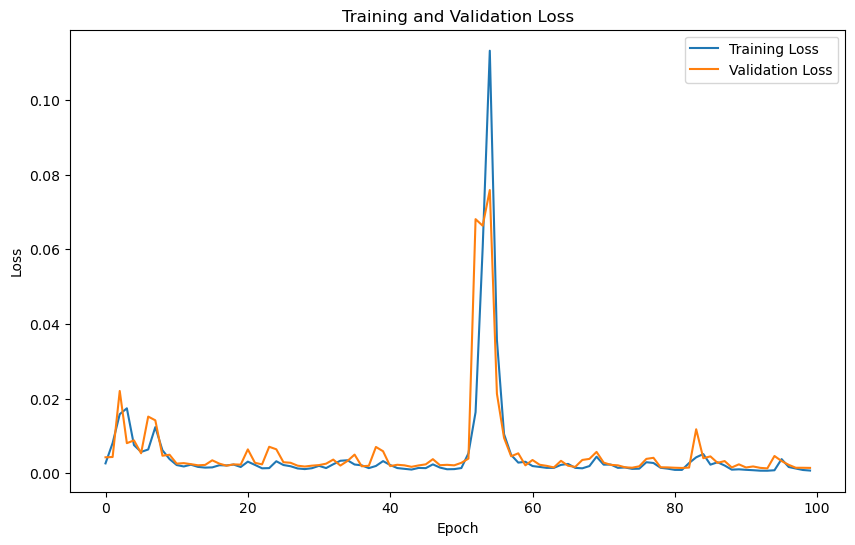

In [53]:
import matplotlib.pyplot as plt



# Plotting the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()